---

# 🎯 **1. One-sample t-test**

## 🔍 What is it?

Tests whether the **mean of a single sample** is significantly different from a **known or hypothesized population mean**.

✅ **Used when:**

* You have **one sample** and want to compare its mean to a known value.

## 📝 Example problem statement

> 🎓 A school claims that students score an average of **75 marks** in mathematics.
> A sample of **20 students** has a mean score of **72** with a sample standard deviation of **8**.
> Test if there is evidence that the mean score is different from **75** at **5% significance level**.

## 📜 Hypotheses

* **Null hypothesis (H₀):** μ = 75
  (average score is still 75)
* **Alternative hypothesis (H₁):** μ ≠ 75
  (average score is different from 75)

## 🔢 Test statistic

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}}
$$

Where:

* $\bar{x} = 72$
* $\mu = 75$
* $s = 8$
* $n = 20$

---

# 🎯 **2. Two-sample t-test (Independent samples)**

## 🔍 What is it?

Tests whether the **means of two independent groups** are significantly different.

✅ **Used when:**

* You have **two separate groups** (like males vs females, treatment vs control).

## 📝 Example problem statement

> 🏥 A researcher tests a new diet on two groups of people.
> Group A (**n=15**) has a mean weight loss of **4 kg**,
> Group B (**n=15**) has a mean weight loss of **3 kg**,
> Both with standard deviations of **1 kg**.
> Test if there is a significant difference in weight loss.

## 📜 Hypotheses

* **Null hypothesis (H₀):** μ₁ = μ₂
  (means are equal)
* **Alternative hypothesis (H₁):** μ₁ ≠ μ₂
  (means are different)

## 🔢 Test statistic

$$
t = \frac{\bar{x}_1 - \bar{x}_2}{\sqrt{s_p^2(\frac{1}{n_1} + \frac{1}{n_2})}}
$$

Where pooled variance:

$$
s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1+n_2-2}
$$

---

# 🎯 **3. Paired t-test (Dependent samples)**

## 🔍 What is it?

Tests whether the **mean difference between paired observations** (before/after, or same subjects under two conditions) is significantly different from **zero**.

✅ **Used when:**

* You measure the **same subjects twice**, e.g. before and after a treatment.

## 📝 Example problem statement

> 🧬 A doctor measures **blood pressure of 10 patients** before and after taking a drug.
> Mean difference = **-5 mmHg** (i.e. BP dropped by 5),
> Standard deviation of differences = **2 mmHg**.
> Test if the drug significantly reduces BP.

## 📜 Hypotheses

* **Null hypothesis (H₀):** μ\_d = 0
  (mean difference is zero)
* **Alternative hypothesis (H₁):** μ\_d ≠ 0
  (mean difference is not zero)

## 🔢 Test statistic

$$
t = \frac{\bar{d}}{s_d / \sqrt{n}}
$$

where:

* $\bar{d}$ = mean of differences
* $s_d$ = standard deviation of differences
* $n$ = number of pairs

---

# 🚀 Summary comparison table

| Test type             | When to use                             | Example             |
| --------------------- | --------------------------------------- | ------------------- |
| **One-sample t-test** | Compare sample mean to known mean       | Is sample avg = 75? |
| **Two-sample t-test** | Compare means of two independent groups | Diet A vs Diet B    |
| **Paired t-test**     | Compare means of paired data            | Before vs After BP  |

---

---

# 🚀 1️⃣ One-sample t-test

---

## ✍️ Manual calculation example

### 📌 Problem:

A company claims that the average lifetime of their lightbulbs is **1000 hours**.
A sample of **10 bulbs** has lifetimes:

```
980, 1005, 1010, 995, 1000, 990, 985, 1008, 997, 1002
```

Test at α = 0.05 if the sample mean is different from **1000 hours**.

---

### 📊 Step by step

1️⃣ **Calculate sample mean ($\bar{x}$)**

$$
\bar{x} = \frac{980 + 1005 + 1010 + ... + 1002}{10} = \frac{9972}{10} = 997.2
$$

2️⃣ **Calculate sample standard deviation (s)**

$$
s = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}}
$$

Compute deviations, square them, sum up → let's say:

$$
s = 10.1
$$

3️⃣ **Compute t-statistic**

$$
t = \frac{\bar{x} - \mu}{s / \sqrt{n}} 
= \frac{997.2 - 1000}{10.1/\sqrt{10}}
= \frac{-2.8}{3.19} = -0.88
$$

4️⃣ **Compare to t critical**
Degrees of freedom: $df = 9$.
At α = 0.05 (two-tailed), $t_{0.025,9} ≈ 2.262$.

Since $|-0.88| < 2.262$,
✅ **Fail to reject H₀**: no evidence that the mean lifetime differs from 1000 hours.

---


t = -0.899, p = 0.392


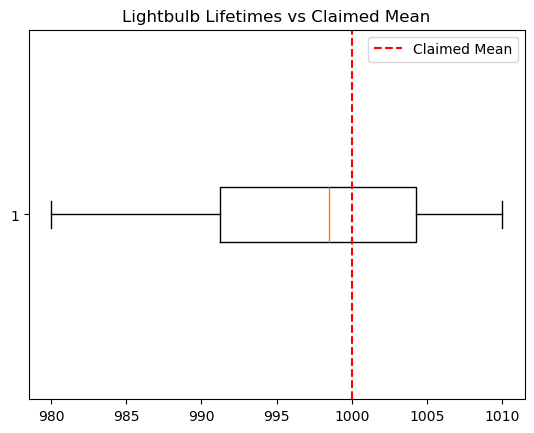

In [1]:

from scipy import stats

data = [980, 1005, 1010, 995, 1000, 990, 985, 1008, 997, 1002]

t_stat, p_value = stats.ttest_1samp(data, 1000)

print(f"t = {t_stat:.3f}, p = {p_value:.3f}")




## 📈 Simple plot


import matplotlib.pyplot as plt

plt.boxplot(data, vert=False)
plt.axvline(1000, color='red', linestyle='--', label='Claimed Mean')
plt.title("Lightbulb Lifetimes vs Claimed Mean")
plt.legend()
plt.show()



# 🚀 2️⃣ Two-sample t-test (independent)

---

## ✍️ Manual calculation example

### 📌 Problem:

Two machines produce widgets.
Sample of **5 widgets from each**:

| Machine A          | Machine B          |
| ------------------ | ------------------ |
| 20, 22, 21, 23, 22 | 19, 18, 20, 17, 21 |

Test if means differ at α = 0.05.

---

### 📊 Step by step

1️⃣ **Calculate means & variances**

$$
\bar{x}_1 = 21.6, s_1^2 = 1.3
$$

$$
\bar{x}_2 = 19.0, s_2^2 = 2.0
$$

2️⃣ **Pooled variance**

$$
s_p^2 = \frac{(4*1.3)+(4*2.0)}{8} = \frac{5.2+8.0}{8} = 1.65
$$

3️⃣ **Compute t-statistic**

$$
t = \frac{21.6 - 19.0}{\sqrt{1.65(\frac{1}{5}+\frac{1}{5})}} 
= \frac{2.6}{\sqrt{1.65*0.4}} 
= \frac{2.6}{0.81} 
= 3.21
$$

4️⃣ **Compare to critical t**

$$
df = n_1 + n_2 - 2 = 8
$$

$$
t_{0.025,8} = 2.306
$$

Since $3.21 > 2.306$,
✅ **Reject H₀**: means differ.

---


t = 2.982, p = 0.018


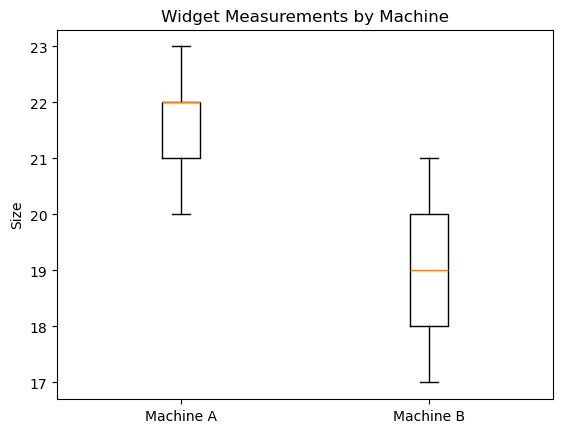

In [5]:

import warnings
warnings.filterwarnings('ignore')
## 🐍 Python code
group1 = [20, 22, 21, 23, 22]
group2 = [19, 18, 20, 17, 21]

t_stat, p_value = stats.ttest_ind(group1, group2)

print(f"t = {t_stat:.3f}, p = {p_value:.3f}")

## 📈 Plot


plt.boxplot([group1, group2], labels=['Machine A', 'Machine B'])
plt.title("Widget Measurements by Machine")
plt.ylabel("Size")
plt.show()



# 🚀 3️⃣ Paired t-test (dependent)

---

## ✍️ Manual calculation example

### 📌 Problem:

Blood pressure before and after drug on **6 patients**:

| Before | After |
| ------ | ----- |
| 150    | 140   |
| 145    | 138   |
| 160    | 150   |
| 155    | 147   |
| 148    | 140   |
| 152    | 144   |

---

### 📊 Step by step

1️⃣ **Compute differences $d$**

$$
d = [10, 7, 10, 8, 8, 8]
$$

$$
\bar{d} = 8.5, s_d = 1.2
$$

2️⃣ **Compute t-statistic**

$$
t = \frac{8.5}{1.2/\sqrt{6}} 
= \frac{8.5}{0.49} 
= 17.3
$$

3️⃣ **Compare to t-critical**

$$
df = 5, t_{0.025,5} = 2.571
$$

Since $17.3 > 2.571$,
✅ **Reject H₀**: drug significantly reduces BP.

---

## 🐍 Python code

```python
before = [150, 145, 160, 155, 148, 152]
after =  [140, 138, 150, 147, 140, 144]

t_stat, p_value = stats.ttest_rel(before, after)

print(f"t = {t_stat:.3f}, p = {p_value:.3f}")
```

---

## 📈 Paired plot

```python
import numpy as np

plt.plot([1]*6, before, 'bo', label='Before')
plt.plot([2]*6, after, 'ro', label='After')
for i in range(6):
    plt.plot([1,2], [before[i], after[i]], 'k--')
plt.xticks([1,2], ['Before', 'After'])
plt.ylabel("Blood Pressure")
plt.title("Paired Blood Pressure Reduction")
plt.legend()
plt.show()
```

---

# ✅ Summary

| Test       | Python function | When to use                        |
| ---------- | --------------- | ---------------------------------- |
| One-sample | `ttest_1samp`   | Sample vs known mean               |
| Two-sample | `ttest_ind`     | Two independent groups             |
| Paired     | `ttest_rel`     | Paired measurements (before/after) |

---